In [1]:
import pandas as pd
df_orders = pd.read_csv("orders.csv")
df_details = pd.read_csv("order_details.csv")
df_pizzas = pd.read_csv("pizzas.csv")
df_types = pd.read_csv("pizza_types.csv", encoding="latin1")



In [2]:
df_types.head()


,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [3]:
df = (
    df_details
    .merge(df_orders, on="order_id")
    .merge(df_pizzas, on="pizza_id")
    .merge(df_types, on="pizza_type_id")
)


In [4]:
df.head()
df.shape


(48620, 12)

In [5]:
df.head()


,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [6]:
df.shape


(48620, 12)

In [7]:
df["order_id"].nunique()


21350

In [8]:
df["revenue"] = df["quantity"] * df["price"]
df["revenue"].sum()


np.float64(817860.05)

In [9]:
df["revenue"] = df["quantity"] * df["price"]


In [10]:
print(df["quantity"]) 
print(df["price"])

0        1
1        1
2        1
3        1
4        1
        ..
48615    1
48616    1
48617    1
48618    1
48619    1
Name: quantity, Length: 48620, dtype: int64
0        13.25
1        16.00
2        18.50
3        20.75
4        16.00
         ...  
48615    16.75
48616    17.95
48617    12.00
48618    20.25
48619    12.75
Name: price, Length: 48620, dtype: float64


In [11]:
df["revenue"] = df["quantity"] * df["price"]
df["revenue"].sum()


np.float64(817860.05)

In [12]:
df.groupby("name")["quantity"].sum().sort_values(ascending=False).head(5)


name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64

In [13]:
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,revenue
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00


In [14]:
df.groupby("name")["revenue"].sum().sort_values(ascending=False).head(5)

name
The Thai Chicken Pizza          43434.25
The Barbecue Chicken Pizza      42768.00
The California Chicken Pizza    41409.50
The Classic Deluxe Pizza        38180.50
The Spicy Italian Pizza         34831.25
Name: revenue, dtype: float64

In [15]:
df.groupby("name")["price"].sum().sort_values(ascending=False).head(5)

name
The Thai Chicken Pizza          42332.25
The Barbecue Chicken Pizza      41683.00
The California Chicken Pizza    40166.50
The Classic Deluxe Pizza        37631.50
The Spicy Italian Pizza         34163.50
Name: price, dtype: float64

In [16]:
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,revenue
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00


In [17]:
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,revenue
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00


In [18]:
import pandas as pd
df_orders = pd.read_csv("orders.csv")
df_details = pd.read_csv("order_details.csv")
df_pizzas = pd.read_csv("pizzas.csv")
df_types = pd.read_csv("pizza_types.csv", encoding="latin1")

In [19]:
import pandas as pd
df_orders = pd.read_csv("orders.csv")
df_details = pd.read_csv("order_details.csv")
df_pizzas = pd.read_csv("pizzas.csv")
df_types = pd.read_csv("pizza_types.csv", encoding="latin1")

In [20]:
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,revenue
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00


In [24]:
df.groupby("category")["quantity"].head()

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
14    1
15    1
16    1
19    1
21    1
24    1
25    1
26    1
Name: quantity, dtype: int64

In [26]:
df.groupby("pizza_type_id")["quantity"].sum().head()

pizza_type_id
bbq_ckn       2432
big_meat      1914
brie_carre     490
calabrese      937
cali_ckn      2370
Name: quantity, dtype: int64

In [29]:
df.groupby("category")["quantity"].sum().head().sort_values(ascending=False)


category
Classic    14888
Supreme    11987
Veggie     11649
Chicken    11050
Name: quantity, dtype: int64

In [30]:
df.groupby("category")["quantity"].sum().head().sort_values(ascending=False)


category
Classic    14888
Supreme    11987
Veggie     11649
Chicken    11050
Name: quantity, dtype: int64

In [32]:
df.groupby("category")["revenue"].sum().sort_values(ascending=False).head()

category
Classic    220053.10
Supreme    208197.00
Chicken    195919.50
Veggie     193690.45
Name: revenue, dtype: float64

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")  

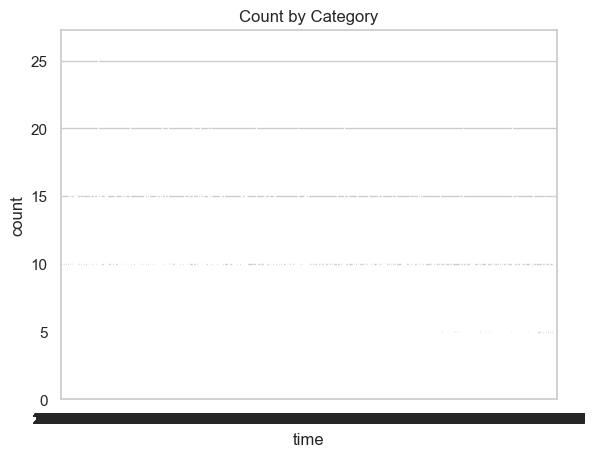

In [34]:
sns.countplot(data=df, x="time")
plt.title("Count by Category")
plt.show()



In [36]:
df["time"].head(10)
df["time"].dtype


dtype('O')

In [37]:
df["time"].head(10)

0    11:38:36
1    11:57:40
2    11:57:40
3    11:57:40
4    11:57:40
5    11:57:40
6    12:12:28
7    12:12:28
8    12:16:31
9    12:21:30
Name: time, dtype: object

In [38]:
df["hour"] = pd.to_datetime(df["time"], format="%H:%M:%S", errors="coerce").dt.hour


In [39]:
df[["time", "hour"]].head()


,time,hour
0,11:38:36,11
1,11:57:40,11
2,11:57:40,11
3,11:57:40,11
4,11:57:40,11


In [40]:
hourly_orders=df.groupby("hour")["order_id"].nunique().reset_index()


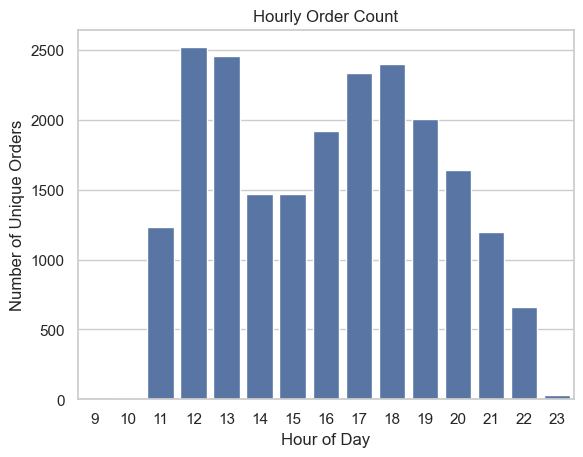

In [42]:
sns.barplot(data=hourly_orders, x="hour", y="order_id")
plt.title("Hourly Order Count")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Unique Orders")
plt.show()


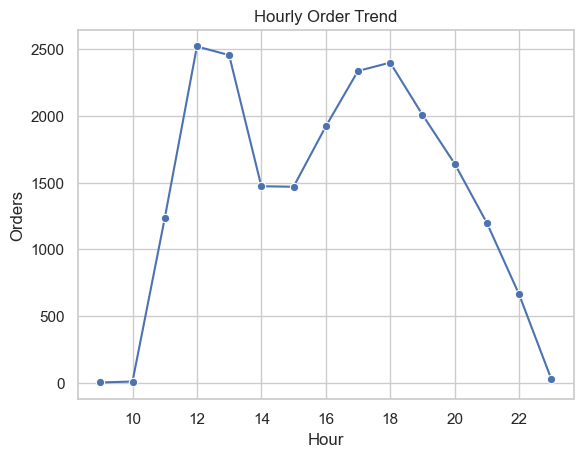

In [43]:
sns.lineplot(data=hourly_orders, x="hour", y="order_id", marker="o")
plt.title("Hourly Order Trend")
plt.xlabel("Hour")
plt.ylabel("Orders")
plt.grid(True)
plt.show()


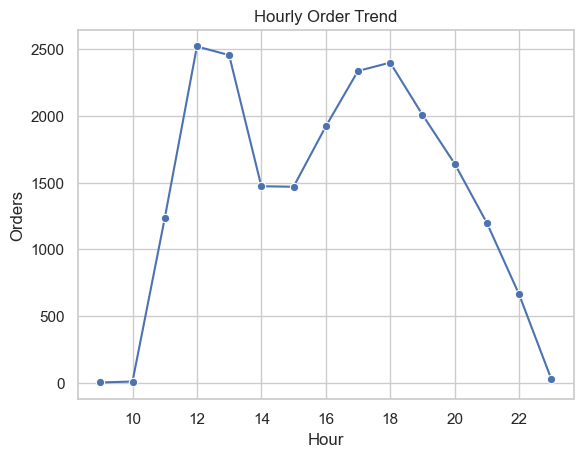

In [44]:
sns.lineplot(data=hourly_orders, x="hour", y="order_id", marker="o")
plt.title("Hourly Order Trend")
plt.xlabel("Hour")
plt.ylabel("Orders")
plt.show()


In [45]:
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,revenue,hour
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,11
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,11
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50,11
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,11
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00,11


In [46]:
df.groupby("size")["quantity"].sum().head().sort_values(ascending=False)

size
L      18956
M      15635
S      14403
XL       552
XXL       28
Name: quantity, dtype: int64

In [47]:
df.groupby("size")["quantity"].sum().sort_values(ascending=False).head()

size
L      18956
M      15635
S      14403
XL       552
XXL       28
Name: quantity, dtype: int64

In [48]:
df.groupby("size")["revenue"].sum().sort_values(ascending=False)


size
L      375318.70
M      249382.25
S      178076.50
XL      14076.00
XXL      1006.60
Name: revenue, dtype: float64

In [49]:
df.groupby("size")["revenue"].mean().sort_values(ascending=False)


size
XXL    35.950000
XL     25.875000
L      20.259025
M      16.209441
S      12.596484
Name: revenue, dtype: float64

In [50]:
order_size_revenue = df.groupby(["order_id", "size"])["revenue"].sum().reset_index()


In [52]:
print("order_size_revenue")

order_size_revenue


In [53]:
order_size_revenue.groupby("size")["revenue"].mean().sort_values(ascending=False)


size
XXL    35.950000
L      29.469119
XL     25.875000
M      22.348082
S      16.975834
Name: revenue, dtype: float64